# Marvin query Results

Now that you have performed your first query, let's take at what Marvin returns as a Marvin Results object.

In [3]:
from marvin import config
config.mode='local' # 'remote'
config.switchSasUrl('local')
config.setRelease('MPL-4')

In [10]:
from marvin.tools.query import Query, Results, doQuery

# make a query
myquery = 'nsa.sersic_logmass > 10.3 AND nsa.z < 0.1'
q = Query(searchfilter=myquery)
 
# run a query
r = q.run()

Your parsed filter is: 
and_(nsa.sersic_logmass>10.3, nsa.z<0.1)
my params ['cube.mangaid', 'cube.plate', 'cube.plateifu', 'ifu.name', 'nsa.sersic_logmass', 'nsa.z']


Let's look at the Marvin Results object.  We can see how many results were returned with r.count and r.totalcount

In [5]:
print(r)
print('Total count', r.totalcount)
print('Page count', r.count)

Marvin Results(results=(u'1-634825', 7990, u'7990-1901', u'1901', 0.0300175, 46190200000.0), 
query=<marvin.core.caching_query.CachingQuery object at 0x11a9634d0>, 
count=414, 
mode=local
('Total count', 414L)
('Page count', 414L)


Queries returning more than 1000 results are paginated into chunks of 100.  For anything less than 1000, the query will return everything.  Totalcount shows the total result count, and count shows the returned count in just that page.

The results from your query are stored in the .results attribute, as a list of NamedTuples.  These are like regular tuples except they have names (like dictionary key names)

In [6]:
r.results

         decorator instead.
WARNING

: DisplayFormatter._formatters_default is deprecated: use @default decorator
         instead.
         decorator instead.
         decorator instead.
         instead.


[(u'1-634825', 7990, u'7990-1901', u'1901', 0.0300175, 46190200000.0),
 (u'1-47618', 8244, u'8244-1901', u'1901', 0.0887979, 154265000000.0),
 (u'1-91577', 8481, u'8481-1901', u'1901', 0.0457518, 113932000000.0),
 (u'1-594386', 8482, u'8482-1901', u'1901', 0.0415421, 92095400000.0),
 (u'1-113712', 7815, u'7815-6104', u'6104', 0.0806967, 31072000000.0),
 (u'1-46562', 8243, u'8243-12701', u'12701', 0.0448787, 83472200000.0),
 (u'1-46825', 8243, u'8243-12703', u'12703', 0.0304661, 73170500000.0),
 (u'1-547159', 7957, u'7957-12705', u'12705', 0.0736188, 47980800000.0),
 (u'1-634538', 7957, u'7957-3701', u'3701', 0.0362875, 53700300000.0),
 (u'1-561020', 7957, u'7957-6101', u'6101', 0.0311029, 54459300000.0),
 (u'1-546834', 7957, u'7957-6103', u'6103', 0.0278009, 51739200000.0),
 (u'1-178586', 7962, u'7962-12703', u'12703', 0.0477401, 79088400000.0),
 (u'1-178541', 7962, u'7962-3703', u'3703', 0.0825072, 73712700000.0),
 (u'1-178233', 7962, u'7962-6102', u'6102', 0.0434744, 263747000000.0),

You can access specific values of the results through tuple indexing or via the named attribute, but this is not recommended in general.

In [ ]:
res = r.results[0]
print('single row', res)
print('mangaid', res[0])
print('mangaid', res.mangaid)

# what are the names
print('names', res.keys())
print(res.sersic_mass)

** But be careful ** Names using the full `table.parameter` syntax cannot be accessed via the named attribute.  This syntax is returned when two parameters with non-unique names are returned, like `ifu.name` and `bintype.name`.  Instead we recommend using the Marvin Results **getListOf** and **getDictOf** methods.

In [ ]:
# if you want a retrieve a list of a single parameter, use getListOf
mangaid = r.getListOf('mangaid')
print(mangaid)

To see what columns are available, use r.columns and r.coltoparam

In [ ]:
# these are the column names in the results
print('columns', r.columns) 

# this is a mapping between the column and full parameter name, see also r.paramtocol for the inverse
print('full parameter names', r.coltoparam)
print('parameter keys', r.coltoparam.keys())
print('parameter values', r.coltoparam.values())

if you want to retrieve the results as a list of dictionaries or dictionary of lists, use getDictOf

In [ ]:
# by default, getDictOf returns a list of dictionaries, that you can iterate over
mylist = r.getDictOf()
print(mylist)
print('mangaid', mylist[0]['cube.mangaid'], mylist[1]['cube.mangaid'])

you can change the format returned using the **format_type** keyword.  **format_type='dictlist'** returns a dictionary of lists getDictOf returns a list of dictionaries

In [ ]:
mydict = r.getDictOf(format_type='dictlist')
print(mydict)
print('keys', mydict.keys())
print('mangaid', mydict['cube.mangaid'])

# Retrieving More Results
If your returned results have been paginated, you can retrieve more using **r.getNext**, **r.getPrevious**, and  **r.getSubset** 

In [ ]:
# get the next set of results
r.getNext()

In [ ]:
# get only the next 10 results
r.getNext(chunk=10)

In [ ]:
# get the previous 20 results
r.getPrevious(chunk=20)

In [ ]:
# get a subset of results giving the starting index and number limit
# total results
print('total', r.totalcount)

# let's get a subset of 10 rows starting at 300
r.getSubset(300, limit=10)

# Sorting results
You can sort your results using the **r.sort** method.  You can sort on any of the returned columns, using either the column name or full parameter name.  

In [ ]:
# let's sort by redshift.  Default is in ascending order
r.sort('z')

# or in descending order
r.sort('nsa.z', order='desc')

# Converting to Marvin Tool Objects
Once you have a set of results, you may want to work with them using Marvin Tools.  You can easily convert to Marvin Tools using the method **r.convertToTool**.  This method lets you convert to Marvin Cubes, Spaxels, Maps, RSS, or ModelCube objects.  **Note:** You must have the necessary parameters to initialize a particular Marvin object.  

In [ ]:
# See some results
r.results[0:3]

# Let's convert our results to Marvin Cube objects
r.columns
r.convertToTool('cube')

# Your new objects are stored as a list in your results called objects
r.objects

# Save your Results and restore them

In [7]:
# We strongly recommend saving to a Marvin pickle file (.mpf), so that you can restore the Results object later
r.save('results.mpf')
restored = Results.restore('results.mpf')

MarvinError: Error found while pickling: a class that defines __slots__ without defining __getstate__ cannot be pickled

In [ ]:
# Saving to CSV, JSON, xlsx, txt, or FITS
df = r.toDataFrame()
df.to_csv('results.csv')
df.to_json('results.json')
df.to_excel('results.xlsx')
table = r.toTable()
table.write('results.txt')
r.toFits('results.fits')

# Plot your Results

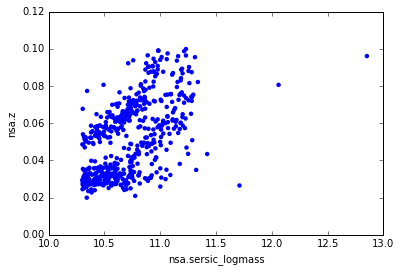

In [13]:
%matplotlib inline
df = r.toDataFrame()
df.plot.scatter('nsa.sersic_logmass', 'nsa.z')